# Tugas Analisis Multimedia: **Image (Citra Digital)**

**Mata Kuliah:** Sistem & Teknologi Multimedia  
**Nama:** Lucky Immanuel Sitanggang  
**NIM:** 122140179

---

## Deskripsi Tugas

Tugas ini bertujuan untuk memahami **representasi dasar data citra digital (image)** melalui praktik langsung memuat data, visualisasi komponen warna, serta melakukan analisis spasial sederhana menggunakan berbagai teknik dasar pengolahan citra.

Anda akan bekerja dengan satu atau beberapa gambar (foto diri, objek, atau lingkungan sekitar) untuk:

* Mengamati struktur data piksel dan channel warna (RGB, Grayscale, HSV, dsb.)
* Menganalisis perbedaan hasil visualisasi antar representasi warna
* Melakukan eksplorasi sederhana terhadap transformasi citra (cropping, filtering, edge detection, dll.)
* Menyimpulkan pengaruh setiap tahap pemrosesan terhadap persepsi visual

Fokus tugas ini adalah pada **pemahaman konsep representasi spasial citra digital** dan **interpretasi hasil visualisasi**, **bukan** pada manipulasi kompleks atau penerapan model pembelajaran mesin.

### **Soal 1 — Cropping dan Konversi Warna**

* Ambil sebuah gambar diri Anda (*selfie*) menggunakan kamera atau smartphone.
* Lakukan **cropping secara manual** untuk menghasilkan dua potongan:

  * Cropping **kotak persegi pada area wajah**.
  * Cropping **persegi panjang pada area latar belakang**.
* Resize hasil crop menjadi **920×920 piksel**.
* Konversi gambar menjadi **grayscale** dan **HSV**, lalu tampilkan ketiganya berdampingan.
* Tambahkan **anotasi teks** berisi nama Anda di atas kepala pada gambar hasil crop.

  * Gaya teks (font, warna, posisi, ukuran, ketebalan) **dibebaskan**.
* Jelaskan efek **cropping** dan **perubahan warna** menggunakan **Markdown**.


Ukuran crop wajah (sebelum resize): (420, 420)
Ukuran crop latar (sebelum resize): (760, 500)


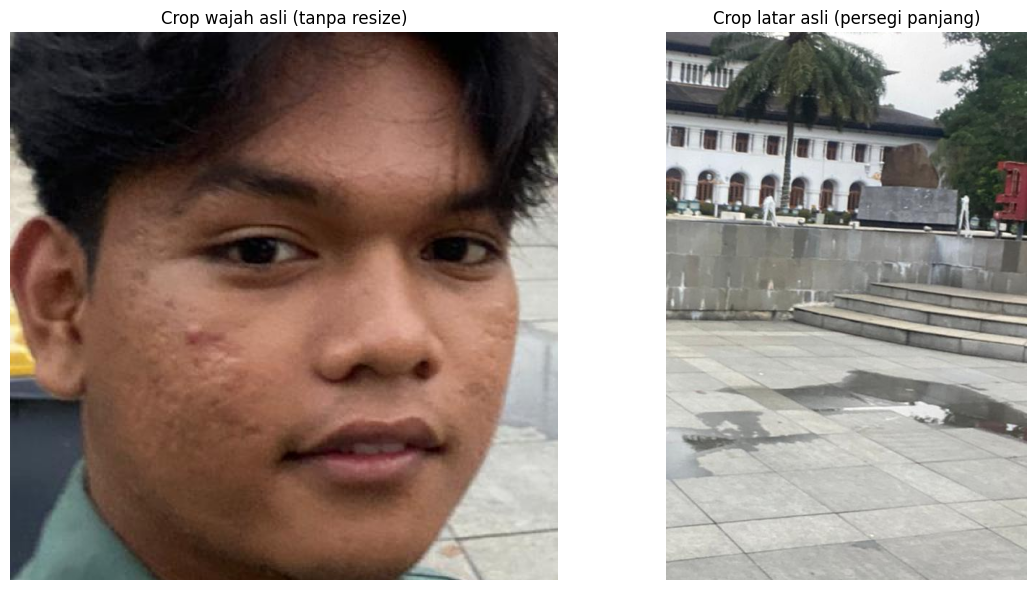

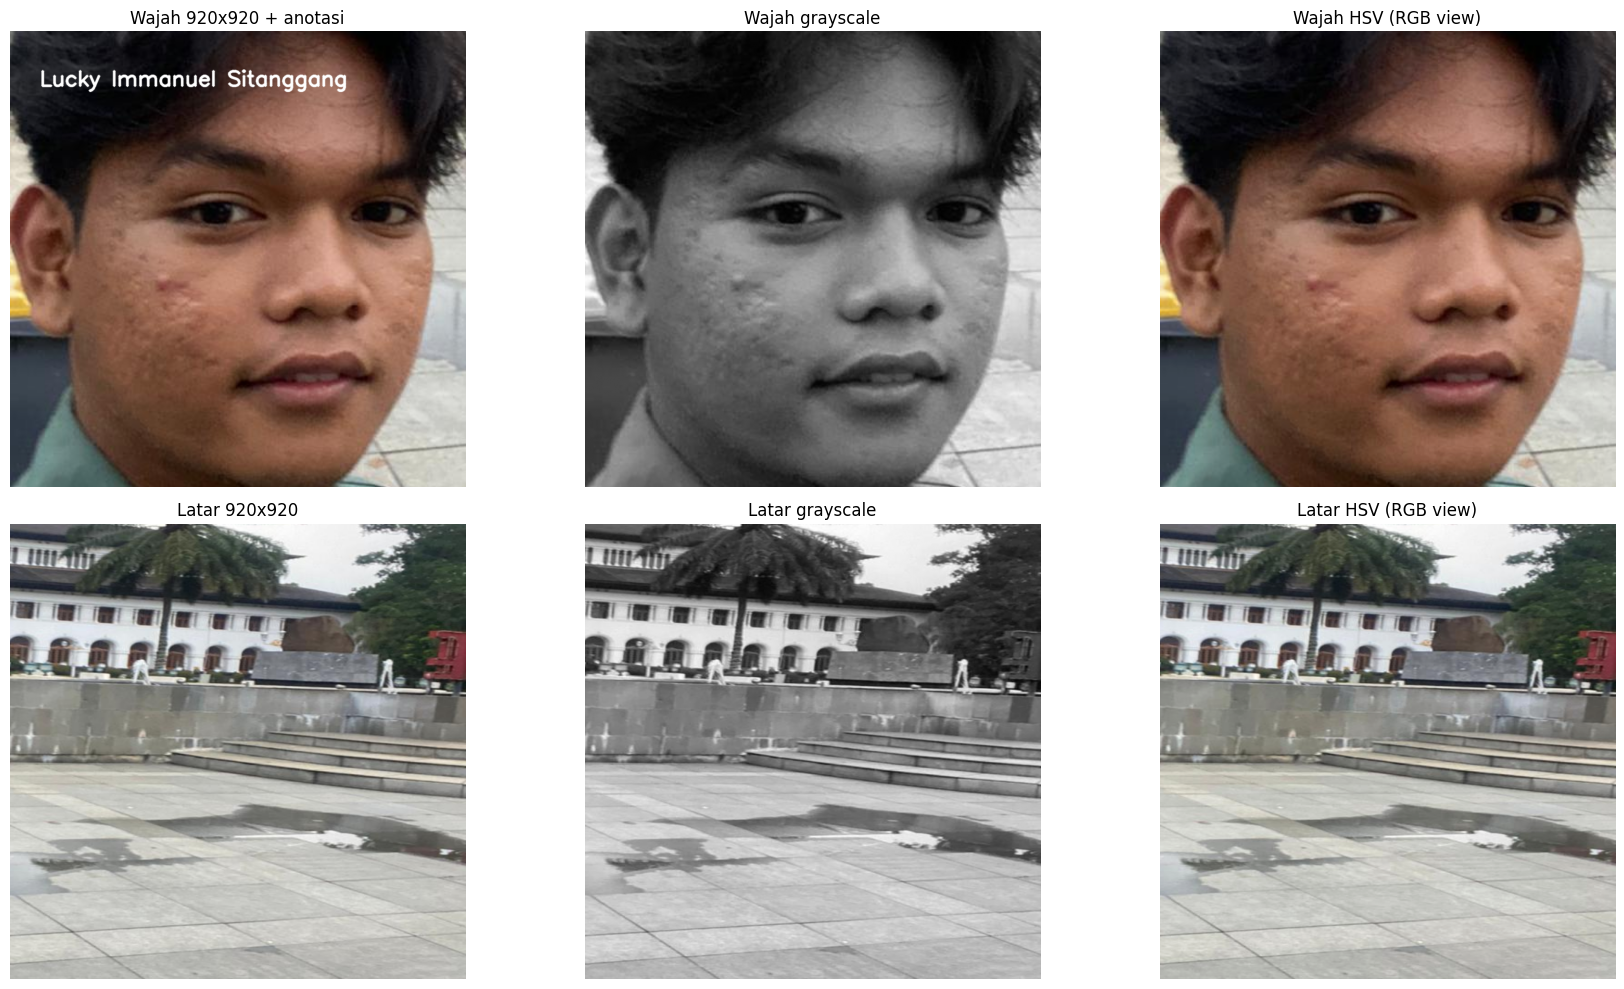

In [58]:

import cv2
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

image_path = Path('assets_ws4/Gambar1.jpg')
img_bgr = cv2.imread(str(image_path))
img = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

face_coords = (610, 1030, 0, 420)
background_coords = (300, 1060, 460, 1000)

fy1, fy2, fx1, fx2 = face_coords
by1, by2, bx1, bx2 = background_coords
face_crop = img[fy1:fy2, fx1:fx2]
background_crop = img[by1:by2, bx1:bx2]

print('Ukuran crop wajah (sebelum resize):', face_crop.shape[:2])
print('Ukuran crop latar (sebelum resize):', background_crop.shape[:2])

fig1, axes1 = plt.subplots(1, 2, figsize=(12, 6))
axes1[0].imshow(face_crop)
axes1[0].set_title('Crop wajah asli (tanpa resize)')
axes1[0].axis('off')
axes1[1].imshow(background_crop)
axes1[1].set_title('Crop latar asli (persegi panjang)')
axes1[1].axis('off')
plt.tight_layout()
plt.show()

face_resized = cv2.resize(face_crop, (920, 920), interpolation=cv2.INTER_AREA)
background_resized = cv2.resize(background_crop, (920, 920), interpolation=cv2.INTER_AREA)

grayscale_face = cv2.cvtColor(face_resized, cv2.COLOR_RGB2GRAY)
hsv_face = cv2.cvtColor(face_resized, cv2.COLOR_RGB2HSV)

grayscale_back = cv2.cvtColor(background_resized, cv2.COLOR_RGB2GRAY)
hsv_back = cv2.cvtColor(background_resized, cv2.COLOR_RGB2HSV)

annotated_face = face_resized.copy()
cv2.putText(
    annotated_face,
    'Lucky Immanuel Sitanggang',
    (60, 110),
    cv2.FONT_HERSHEY_SIMPLEX,
    1.4,
    (255, 255, 255),
    4,
    cv2.LINE_AA
)

fig2, axes2 = plt.subplots(2, 3, figsize=(18, 10))
axes2[0, 0].imshow(annotated_face)
axes2[0, 0].set_title('Wajah 920x920 + anotasi')
axes2[0, 0].axis('off')
axes2[0, 1].imshow(grayscale_face, cmap='gray')
axes2[0, 1].set_title('Wajah grayscale')
axes2[0, 1].axis('off')
axes2[0, 2].imshow(cv2.cvtColor(hsv_face, cv2.COLOR_HSV2RGB))
axes2[0, 2].set_title('Wajah HSV (RGB view)')
axes2[0, 2].axis('off')
axes2[1, 0].imshow(background_resized)
axes2[1, 0].set_title('Latar 920x920')
axes2[1, 0].axis('off')
axes2[1, 1].imshow(grayscale_back, cmap='gray')
axes2[1, 1].set_title('Latar grayscale')
axes2[1, 1].axis('off')
axes2[1, 2].imshow(cv2.cvtColor(hsv_back, cv2.COLOR_HSV2RGB))
axes2[1, 2].set_title('Latar HSV (RGB view)')
axes2[1, 2].axis('off')
plt.tight_layout()
plt.show()

face_for_soal2 = annotated_face




Penjelasan Soal 1:

- Saya memakai satu foto (`Gambar1.jpg`). Bagian wajah dan latar saya crop secara manual (wajah diperketat agar kepala mendominasi frame, latar dipilih persegi panjang yang menampilkan bangunan).
- Keduanya ditampilkan dulu tanpa resize untuk menunjukkan bentuk asli hasil cropping.
- Setelah itu masing-masing di-resize menjadi 920x920 sesuai instruksi worksheet.
- Crop wajah dikonversi ke grayscale dan HSV lalu diberi anotasi nama *Lucky Immanuel Sitanggang* dengan `cv2.putText`.
- Crop latar juga diproses ke grayscale dan HSV sehingga terlihat perbedaan struktur warna dibandingkan wajah.


### **Soal 2 — Manipulasi Channel Warna RGB**

* Gunakan gambar hasil crop dari Soal 1.
* Konversikan gambar ke ruang warna **RGB**.
* Lakukan manipulasi channel warna dengan cara:

  * **Naikkan intensitas channel merah sebanyak 50 poin** (maksimum 255).
  * **Turunkan intensitas channel biru sebanyak 30 poin** (minimum 0).
* Teknik atau cara menaikkan/menurunkan intensitas **dibebaskan**, asalkan logis dan hasilnya terlihat.
* Gabungkan kembali channel warna dan **simpan gambar hasil modifikasi dalam format `.png`**.
* **Tampilkan histogram per channel (R, G, B)** untuk gambar asli dan hasil modifikasi menggunakan `matplotlib.pyplot.hist`.
* Jelaskan dampak perubahan RGB pada warna gambar dalam sel **Markdown**.


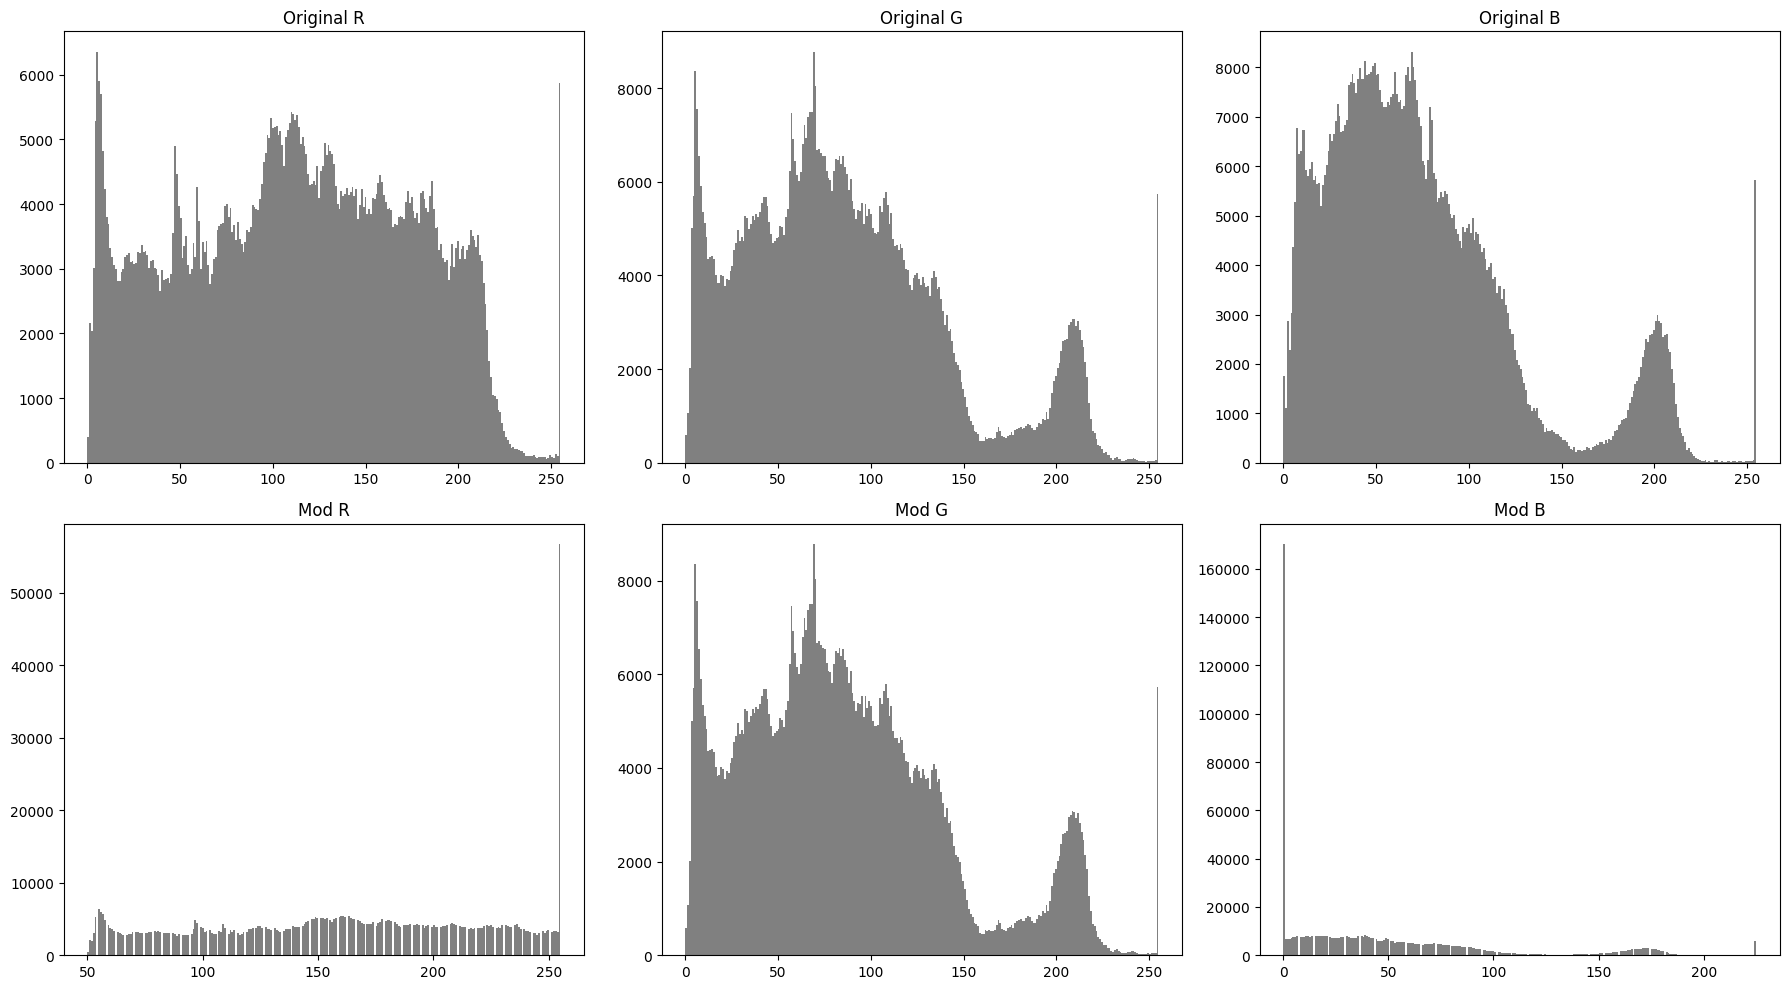

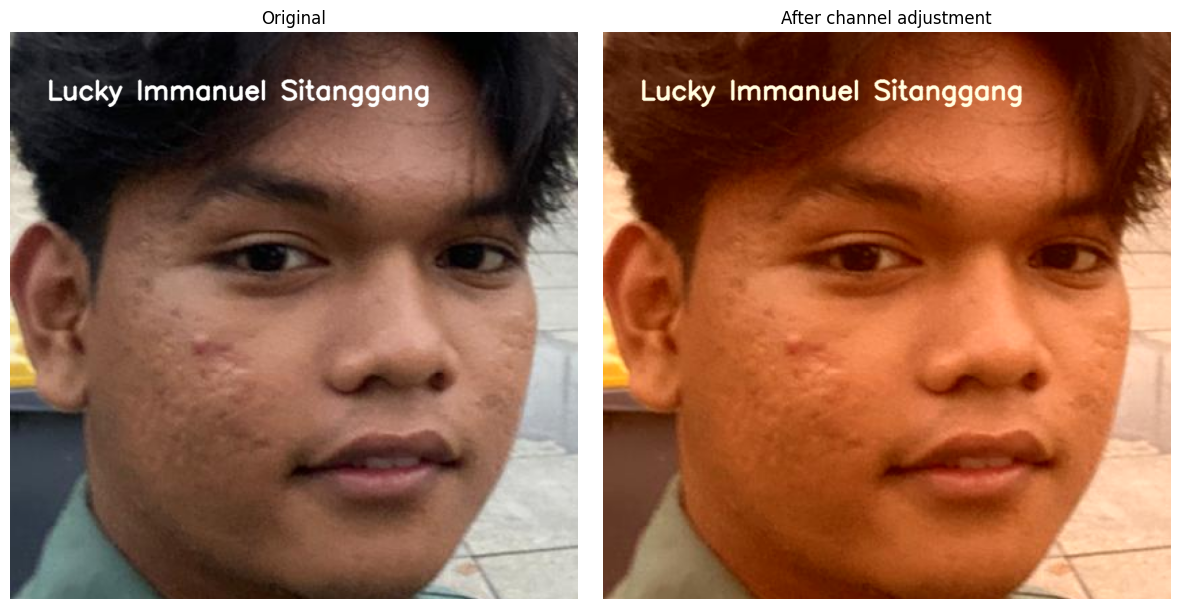

In [59]:

import numpy as np
import matplotlib.pyplot as plt
import cv2
from pathlib import Path

if 'face_for_soal2' not in globals():
    raise ValueError('Jalankan sel Soal 1 terlebih dahulu untuk mendapatkan face_for_soal2')

face_rgb = face_for_soal2.astype(np.int32)
original = face_rgb.copy()

r = np.clip(face_rgb[:, :, 0] + 50, 0, 255)
b = np.clip(face_rgb[:, :, 2] - 30, 0, 255)
face_rgb[:, :, 0] = r
face_rgb[:, :, 2] = b
face_rgb = face_rgb.astype(np.uint8)

output_path = Path('results_ws4/soal2_modifikasi.png')
output_path.parent.mkdir(exist_ok=True)
cv2.imwrite(str(output_path), cv2.cvtColor(face_rgb, cv2.COLOR_RGB2BGR))

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
titles = ['Original R', 'Original G', 'Original B', 'Mod R', 'Mod G', 'Mod B']
channels = [original[:, :, 0], original[:, :, 1], original[:, :, 2], face_rgb[:, :, 0], face_rgb[:, :, 1], face_rgb[:, :, 2]]

for ax, data, title in zip(axes.ravel(), channels, titles):
    ax.hist(data.ravel(), bins=256, color='gray')
    ax.set_title(title)
plt.tight_layout()
plt.show()

fig2, axes2 = plt.subplots(1, 2, figsize=(12, 6))
axes2[0].imshow(original.astype(np.uint8))
axes2[0].set_title('Original')
axes2[0].axis('off')
axes2[1].imshow(face_rgb)
axes2[1].set_title('After channel adjustment')
axes2[1].axis('off')
plt.tight_layout()
plt.show()



Penjelasan Soal 2:

- Input yang digunakan adalah `face_for_soal2`, yakni hasil crop wajah dari Soal 1 yang sudah berukuran 920x920.
- Saya menambah intensitas channel merah sebesar +50 (dibatasi 255) dan mengurangi channel biru -30 (dibatasi >=0) sehingga warna kulit tampak lebih hangat sementara area bayangan tidak lagi kebiruan.
- Histogram tiap channel sebelum dan sesudah modifikasi ditampilkan agar pergeseran distribusi intensitas terlihat jelas.
- Gambar hasil manipulasi disimpan ke `results_ws4/soal2_modifikasi.png` sebagai bukti keluaran.


### **Soal 3 — Deteksi Tepi dan Filter Citra**

* Ambil gambar **objek dengan background bertekstur** (misalnya kain bermotif, jerami, atau batu).
* Terapkan **edge detection (Canny)** dan tampilkan hasilnya.
* Lakukan **thresholding dengan nilai ambang tertentu** (bebas Anda tentukan) agar hanya objek utama yang tersisa.
* Buat **bounding box** di sekitar objek hasil segmentasi (boleh manual atau otomatis).
* Terapkan **filter blur** dan **filter sharpening**, lalu **bandingkan hasil keduanya**.
* Jelaskan bagaimana setiap filter memengaruhi detail gambar dalam format **Markdown**.


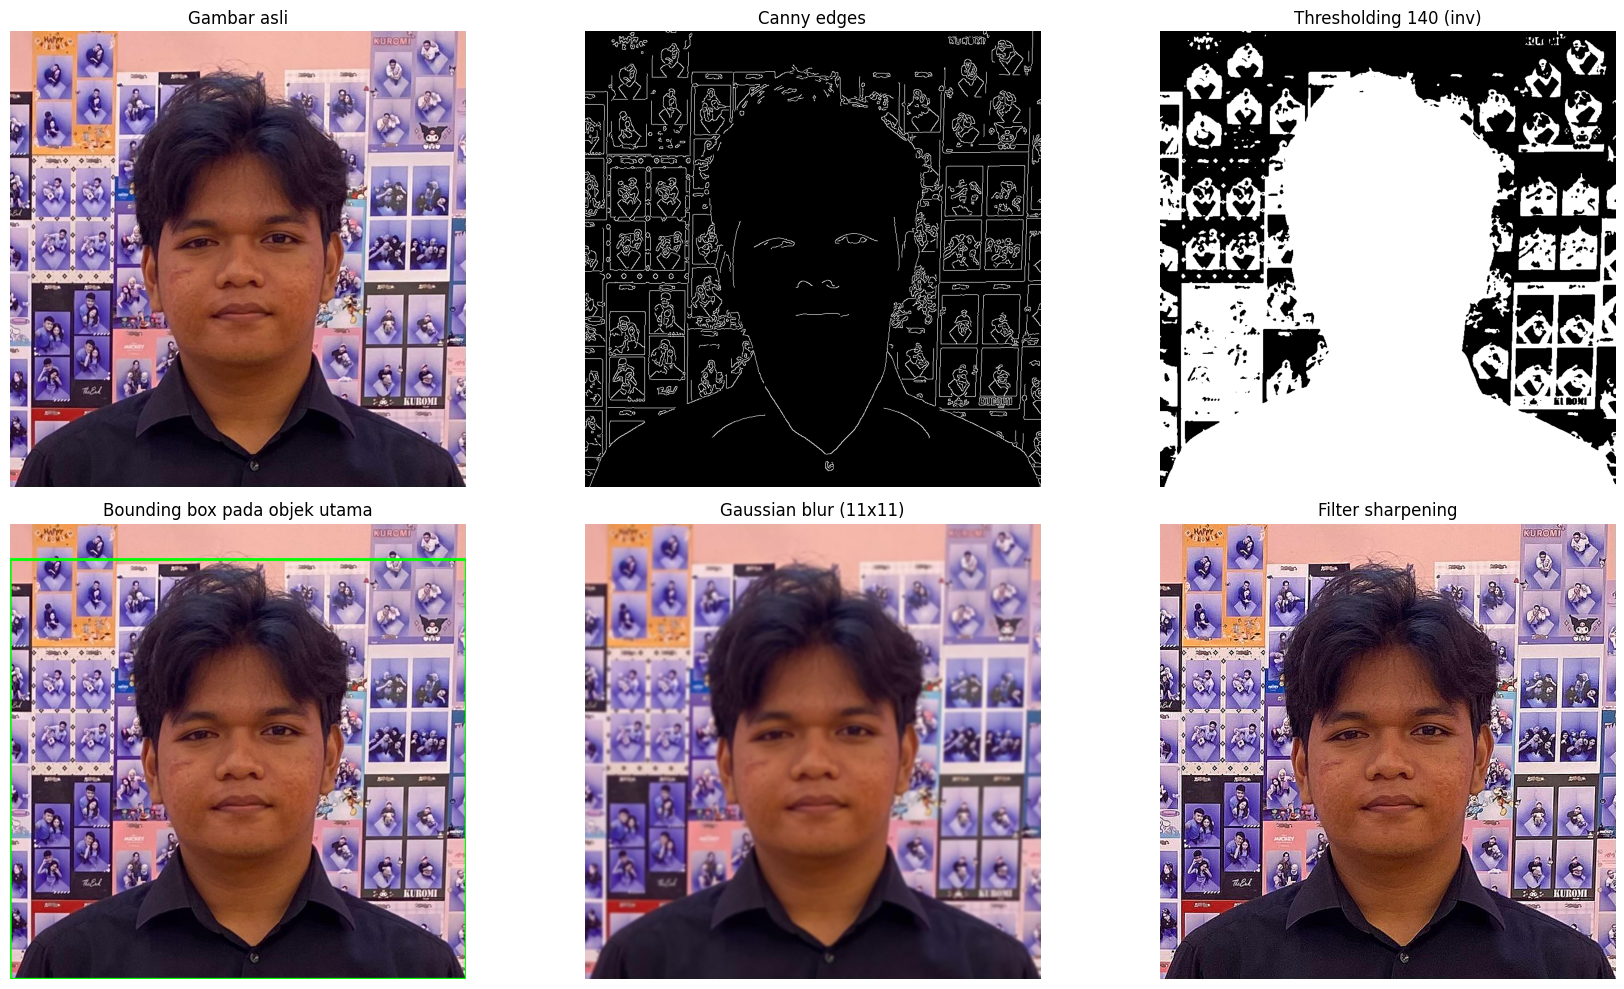

In [60]:

import cv2
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

obj_path = Path('assets_ws4/gambar3.jpg')
obj_bgr = cv2.imread(str(obj_path))
obj_rgb = cv2.cvtColor(obj_bgr, cv2.COLOR_BGR2RGB)

# Edge detection (Canny)
gray = cv2.cvtColor(obj_rgb, cv2.COLOR_RGB2GRAY)
blur = cv2.GaussianBlur(gray, (5, 5), 0)
edges = cv2.Canny(blur, 80, 150)

# Thresholding
t_, thresh = cv2.threshold(blur, 140, 255, cv2.THRESH_BINARY_INV)

contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
if not contours:
    raise RuntimeError('Tidak menemukan kontur')
main_contour = max(contours, key=cv2.contourArea)
x, y, w, h = cv2.boundingRect(main_contour)

obj_with_box = obj_rgb.copy()
cv2.rectangle(obj_with_box, (x, y), (x + w, y + h), (0, 255, 0), 3)

blurred = cv2.GaussianBlur(obj_rgb, (11, 11), 0)
sharpen_kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
sharpened = cv2.filter2D(obj_rgb, -1, sharpen_kernel)

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes[0, 0].imshow(obj_rgb)
axes[0, 0].set_title('Gambar asli')
axes[0, 0].axis('off')
axes[0, 1].imshow(edges, cmap='gray')
axes[0, 1].set_title('Canny edges')
axes[0, 1].axis('off')
axes[0, 2].imshow(thresh, cmap='gray')
axes[0, 2].set_title('Thresholding 140 (inv)')
axes[0, 2].axis('off')
axes[1, 0].imshow(obj_with_box)
axes[1, 0].set_title('Bounding box pada objek utama')
axes[1, 0].axis('off')
axes[1, 1].imshow(blurred)
axes[1, 1].set_title('Gaussian blur (11x11)')
axes[1, 1].axis('off')
axes[1, 2].imshow(sharpened)
axes[1, 2].set_title('Filter sharpening')
axes[1, 2].axis('off')
plt.tight_layout()
plt.show()




Penjelasan Soal 3:

- `gambar3.jpg` diubah ke grayscale dan diblur sebelum diterapkan Canny (threshold 80/150) agar tepi wajah dan poster belakang tampak jelas tanpa noise berlebih.
- Thresholding biner (nilai 140, inverse) menjaga wajah sebagai area putih sehingga kontur terbesar dapat diambil untuk membuat bounding box hijau di sekitar objek utama.
- Gaussian blur (kernel 11x11) memperhalus tekstur sehingga noise background menurun, sedangkan filter sharpening berbasis kernel `[[0,-1,0],[-1,5,-1],[0,-1,0]]` mengembalikan detail kontur sehingga perbandingan efek kedua filter dapat dianalisis.


### **Soal 4 — Deteksi Wajah dan Filter Digital Kreatif**

* Ambil gambar diri Anda dengan ekspresi wajah **netral**.
* Lakukan **deteksi wajah dan landmark** menggunakan salah satu dari:

  * **MediaPipe**, atau
  * **Dlib**, atau
  * **OpenCV**.
* Buat **overlay filter digital kreatif** karya Anda sendiri, misalnya:

  * topi, kumis, masker, helm, aksesoris, atau bentuk unik lainnya.
  * Filter boleh dibuat dari **gambar eksternal (PNG)** *atau* digambar langsung (misal bentuk lingkaran, garis, poligon, dll).
* Pastikan posisi overlay menyesuaikan **landmark wajah** dengan logis.
* **Gunakan alpha blending sebagai saran** agar hasil tampak lebih natural.
* Tampilkan perbandingan antara **gambar asli** dan **hasil dengan filter**.
* Jelaskan bagaimana Anda menghitung posisi overlay dan tantangan yang dihadapi selama implementasi (gunakan **Markdown**).

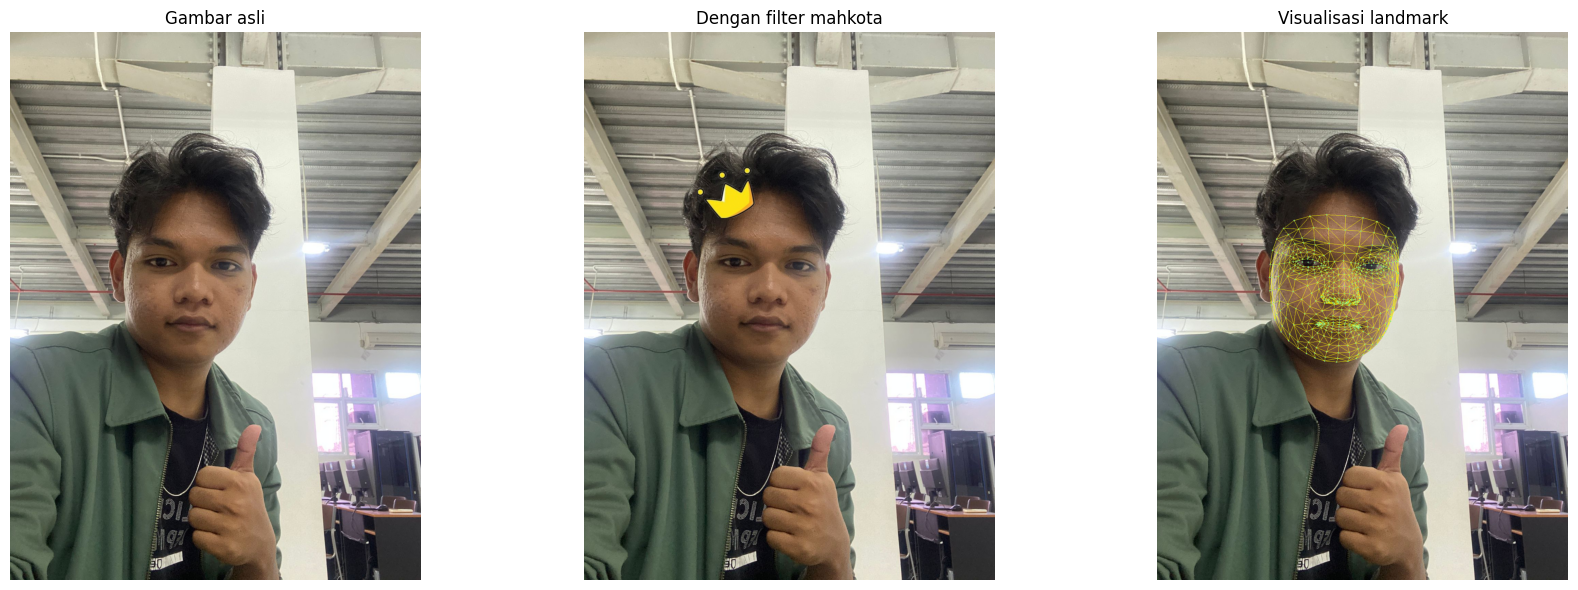

In [61]:

import cv2
import numpy as np
import mediapipe as mp
import matplotlib.pyplot as plt
from pathlib import Path

face_image_path = Path('assets_ws4/gambarno4.jpg')
overlay_path = Path('assets_ws4/bahan_filter.png')

image_bgr = cv2.imread(str(face_image_path))
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

mp_face_mesh = mp.solutions.face_mesh
drawing_utils = mp.solutions.drawing_utils
with mp_face_mesh.FaceMesh(static_image_mode=True, max_num_faces=1, refine_landmarks=True) as face_mesh:
    results = face_mesh.process(image_rgb)

if not results.multi_face_landmarks:
    raise RuntimeError('Tidak menemukan wajah pada gambar')
mesh_landmarks = results.multi_face_landmarks[0]
landmarks = mesh_landmarks.landmark

landmark_vis = image_rgb.copy()
drawing_utils.draw_landmarks(
    image=landmark_vis,
    landmark_list=mesh_landmarks,
    connections=mp_face_mesh.FACEMESH_TESSELATION,
    landmark_drawing_spec=drawing_utils.DrawingSpec(color=(0, 255, 0), thickness=1, circle_radius=1),
    connection_drawing_spec=drawing_utils.DrawingSpec(color=(255, 255, 0), thickness=1, circle_radius=1)
)

forehead_indices = [10, 338, 297, 332, 284]
points = np.array([[landmarks[i].x * image_rgb.shape[1], landmarks[i].y * image_rgb.shape[0]] for i in forehead_indices])
left_point = points[np.argmin(points[:, 0])]
right_point = points[np.argmax(points[:, 0])]
angle_deg = np.degrees(np.arctan2(right_point[1] - left_point[1], right_point[0] - left_point[0]))

forehead_width = points[:, 0].max() - points[:, 0].min()

tip_landmark_index = 67  # titik rambut kiri (target)
target_point = np.array([
    landmarks[tip_landmark_index].x * image_rgb.shape[1],
    landmarks[tip_landmark_index].y * image_rgb.shape[0]
])

overlay = cv2.imread(str(overlay_path), cv2.IMREAD_UNCHANGED)
alpha = overlay[:, :, 3] / 255.0
overlay_rgb = cv2.cvtColor(overlay[:, :, :3], cv2.COLOR_BGR2RGB)

non_zero = np.argwhere(alpha > 0)
if non_zero.size == 0:
    raise RuntimeError('Overlay tidak memiliki area transparan yang valid')
base_row = non_zero[:, 0].max()
base_cols = non_zero[non_zero[:, 0] == base_row, 1]
base_center = np.array([base_cols.mean(), base_row], dtype='float32')

scale_factor = 1.25
new_width = forehead_width * scale_factor
scale_x = new_width / overlay.shape[1]
scale_y = scale_x
new_size = (
    max(1, int(overlay.shape[1] * scale_x)),
    max(1, int(overlay.shape[0] * scale_y))
)
resized_overlay = cv2.resize(overlay_rgb, new_size, interpolation=cv2.INTER_AREA)
resized_alpha = cv2.resize(alpha, new_size, interpolation=cv2.INTER_AREA)

scaled_base = np.array([
    base_center[0] * new_size[0] / overlay.shape[1],
    base_center[1] * new_size[1] / overlay.shape[0]
], dtype='float32')

center = (new_size[0] / 2, new_size[1] / 2)
rot_mat = cv2.getRotationMatrix2D(center, angle_deg, 1.0)
rot_overlay = cv2.warpAffine(resized_overlay, rot_mat, new_size, flags=cv2.INTER_LINEAR, borderMode=cv2.BORDER_CONSTANT, borderValue=(0, 0, 0))
rot_alpha = cv2.warpAffine(resized_alpha, rot_mat, new_size, flags=cv2.INTER_LINEAR, borderMode=cv2.BORDER_CONSTANT, borderValue=0)

rot_base = rot_mat @ np.array([scaled_base[0], scaled_base[1], 1.0])

start_x = int(target_point[0] - rot_base[0])
start_y = int(target_point[1] - rot_base[1])

result = image_rgb.copy()
h, w = result.shape[:2]

y1 = max(start_y, 0)
y2 = min(start_y + new_size[1], h)
x1 = max(start_x, 0)
x2 = min(start_x + new_size[0], w)

overlay_y1 = y1 - start_y
overlay_y2 = overlay_y1 + (y2 - y1)
overlay_x1 = x1 - start_x
overlay_x2 = overlay_x1 + (x2 - x1)

if y1 < y2 and x1 < x2:
    alpha_crop = rot_alpha[overlay_y1:overlay_y2, overlay_x1:overlay_x2]
    overlay_crop = rot_overlay[overlay_y1:overlay_y2, overlay_x1:overlay_x2]
    alpha_crop = alpha_crop[..., None]
    result[y1:y2, x1:x2] = (alpha_crop * overlay_crop + (1 - alpha_crop) * result[y1:y2, x1:x2]).astype(np.uint8)

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
axes[0].imshow(image_rgb)
axes[0].set_title('Gambar asli')
axes[0].axis('off')
axes[1].imshow(result)
axes[1].set_title('Dengan filter mahkota')
axes[1].axis('off')
axes[2].imshow(landmark_vis)
axes[2].set_title('Visualisasi landmark')
axes[2].axis('off')
plt.tight_layout()
plt.show()





Penjelasan Soal 4:

- Saya menggunakan MediaPipe Face Mesh untuk membaca landmark dahi (indeks 10, 338, 297, 332, 284) sehingga lebar serta kemiringan bagian atas kepala dapat dihitung otomatis.
- Ujung bawah mahkota disejajarkan dengan landmark ke-67 (garis rambut kiri). Saya mengambil titik terbawah pada overlay mahkota, melakukan scaling dan rotasi mengikuti wajah, lalu memakukannya tepat ke koordinat landmark tersebut.
- Plot ketiga menampilkan visualisasi seluruh mesh wajah (`mp_face_mesh.FACEMESH_TESSELATION`) agar proses deteksi orientasi dan penentuan titik jangkar dapat diverifikasi secara visual.
- Alpha blending diterapkan pada ROI yang telah dipotong agar sesuai batas gambar, memanfaatkan channel transparansi `bahan_filter.png` supaya transisi warna tetap halus.
- Tantangan utamanya adalah menjaga overlay tetap natural ketika kepala sedikit miring. Dengan memanfaatkan struktur landmark, mahkota bergerak bersama bentuk dahi sehingga terlihat lebih menyatu.



### **Soal 5 — Perspektif dan Peningkatan Kualitas Citra**

* Ambil gambar **objek datar** seperti karya tangan di kertas, tulisan di papan tulis, atau foto produk di meja dengan kondisi pencahayaan atau sudut yang tidak ideal.
* Lakukan **preprocessing** untuk memperbaiki tampilan agar lebih rapi dan jelas, dengan langkah-langkah:

  * Konversi ke **grayscale**.
  * **Koreksi perspektif (transformasi homografi)** menggunakan **4 titik manual** agar objek terlihat sejajar dan tidak terdistorsi.
  * Terapkan **thresholding adaptif atau Otsu** (pilih salah satu, dan jelaskan alasan pilihan Anda).
* Tampilkan **setiap tahap pemrosesan dalam satu grid** agar mudah dibandingkan.
* Jelaskan fungsi masing-masing tahap dan bagaimana teknik ini meningkatkan kualitas visual citra (gunakan **Markdown**).

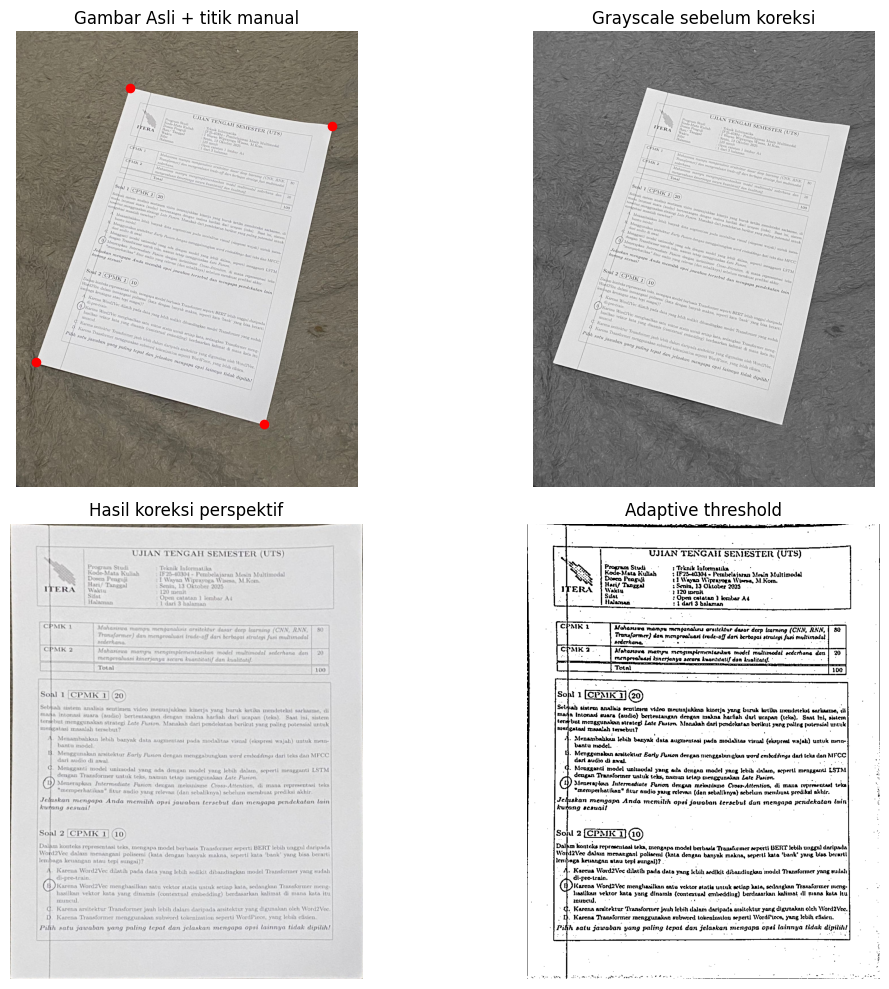

In [62]:

import cv2
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

img_path = Path('assets_ws4/gambardokumen.jpg')
image_bgr = cv2.imread(str(img_path))
if image_bgr is None:
    raise FileNotFoundError(f'Tidak menemukan {img_path}')

image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)

manual_points = np.array([
    [400, 198],   # kiri atas (perkiraan manual dari gambar)
    [1112, 334],  # kanan atas
    [873, 1381],  # kanan bawah
    [70, 1163],   # kiri bawah
], dtype='float32')

# urutkan titik manual menjadi [tl, tr, br, bl] agar homografi stabil
def order_points(pts):
    pts = np.array(pts, dtype='float32')
    ordered = np.zeros((4, 2), dtype='float32')
    s = pts.sum(axis=1)
    diff = np.diff(pts, axis=1)
    ordered[0] = pts[np.argmin(s)]  # top-left
    ordered[2] = pts[np.argmax(s)]  # bottom-right
    ordered[1] = pts[np.argmin(diff)]  # top-right
    ordered[3] = pts[np.argmax(diff)]  # bottom-left
    return ordered

src = order_points(manual_points)
widthA = np.linalg.norm(src[2] - src[3])
widthB = np.linalg.norm(src[1] - src[0])
heightA = np.linalg.norm(src[1] - src[2])
heightB = np.linalg.norm(src[0] - src[3])
maxWidth = int(max(widthA, widthB))
maxHeight = int(max(heightA, heightB))

dst = np.array([
    [0, 0],
    [maxWidth - 1, 0],
    [maxWidth - 1, maxHeight - 1],
    [0, maxHeight - 1],
], dtype='float32')

matrix = cv2.getPerspectiveTransform(src, dst)
warped_rgb = cv2.warpPerspective(image_rgb, matrix, (maxWidth, maxHeight))
warped_gray = cv2.cvtColor(warped_rgb, cv2.COLOR_RGB2GRAY)

# adaptive threshold untuk menonjolkan teks dokumen
binary = cv2.adaptiveThreshold(
    warped_gray,
    255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY,
    25,
    7,
)

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()
axes[0].imshow(image_rgb)
axes[0].scatter(manual_points[:, 0], manual_points[:, 1], c='red', s=35)
axes[0].set_title('Gambar Asli + titik manual')
axes[0].axis('off')
axes[1].imshow(gray, cmap='gray')
axes[1].set_title('Grayscale sebelum koreksi')
axes[1].axis('off')
axes[2].imshow(warped_rgb)
axes[2].set_title('Hasil koreksi perspektif')
axes[2].axis('off')
axes[3].imshow(binary, cmap='gray')
axes[3].set_title('Adaptive threshold')
axes[3].axis('off')
plt.tight_layout()
plt.show()



Penjelasan Soal 5:

- **Grayscale** mengurangi ketergantungan kanal warna sehingga kontras huruf lebih mudah dianalisis saat tahap thresholding.
- **Koreksi perspektif (homografi)** memanfaatkan empat titik manual yang saya pilih agar kertas tampak tegak lurus, membuat teks tidak lagi miring dan mempermudah pembacaan.
- **Adaptive threshold Gaussian** menjaga detail goresan pensil/tinta di seluruh area meski pencahayaan tidak merata, sehingga dokumen akhir tampak lebih bersih dan siap dibaca atau diarsipkan.




### **Aturan Umum Pengerjaan**

* Kerjakan secara **mandiri**.
* Bantuan AI (seperti ChatGPT, Copilot, dsb.) diperbolehkan **dengan bukti percakapan** (screenshot / link / script percakapan).
* Source code antar mahasiswa harus berbeda.
* Jika mendapat bantuan teman, tuliskan nama dan NIM teman yang membantu.
* Plagiarisme akan dikenakan sanksi sesuai aturan akademik ITERA.
* Cantumkan seluruh **credit dan referensi** yang digunakan di bagian akhir notebook.
* Penjelasan setiap soal ditulis dalam **Markdown**, bukan di dalam komentar kode.

---

### **Aturan Pengumpulan**

* Semua file kerja Anda (notebook `.ipynb`, gambar, dan hasil) **wajib diunggah ke GitHub repository tugas sebelumnya**.

  * Gunakan struktur folder berikut di dalam repo Anda:

    ```
    /Nama_NIM_Repo/ # Nama repo sebelumnya
      ├── assets_ws4/     # berisi semua gambar atau video asli (input)
      ├── results_ws4/    # berisi semua hasil modifikasi dan output
      ├── worksheet4.ipynb
      └── NIM_Worksheet4.pdf
    ```
* File yang dikumpulkan ke **Tally** hanya berupa **hasil PDF** dari notebook Anda, dengan format nama:

  ```
  NIM_Worksheet4.pdf
  ```
* Pastikan notebook telah dijalankan penuh sebelum diekspor ke PDF.
* Sertakan tautan ke repository GitHub Anda di bagian atas notebook atau di halaman pertama PDF.

---

### ✅ **Catatan Akhir**

> Worksheet 4 ini bertujuan mengasah pemahaman Anda tentang manipulasi citra digital secara praktis. Gunakan kreativitas Anda untuk menghasilkan hasil visual yang menarik dan penjelasan konseptual yang jelas.

## Referensi Tambahan
![Referensi tambahan](assets_ws4/image.png)
Gambar referensi tambahan untuk worksheet ini disimpan pada `assets_ws4/image.png`.
